### **Introduction**


**This project looks at data from sports betting to find patterns and understand what affects winning or losing a bet. By showing graphs of things like total gains, money made from each sport, and how often people win or lose, we get a clear picture of the data. We also use simple statistics to answer important questions, such as whether some sports are more profitable than others, if the chances of winning change with different odds, and if betting more money leads to bigger gains. This helps us understand what really matters in sports betting.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('bets.csv', sep=';')

Saving bets.csv to bets.csv


# **Data Visualization**

In [ ]:
print("\n" + "="*25 + " DATA OVERVIEW " + "="*25)
print("First 5 rows:")
display(df.head())
print("\nData Info:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nSummary statistics:")
display(df.describe(include='all'))


========================= DATA OVERVIEW =========================
First 5 rows:


,bet_id,user_id,bet_type,sport,odds,is_win,stake,gain,GGR
0,bet_00001,3848,multiple,Ice Hockey,9.44,False,13.65,0.00,13.65
1,bet_00002,153,single,Football,8.79,False,248.45,0.00,248.45
2,bet_00003,1527,single,Football,1.50,True,3.50,5.25,-1.75
3,bet_00004,3903,single,Tennis,1.55,False,151.45,0.00,151.45
4,bet_00005,2290,single,Football,1.47,True,319.05,469.00,-149.95



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   bet_id    100000 non-null  object 
 1   user_id   100000 non-null  int64  
 2   bet_type  100000 non-null  object 
 3   sport     100000 non-null  object 
 4   odds      100000 non-null  float64
 5   is_win    100000 non-null  bool   
 6   stake     100000 non-null  float64
 7   gain      100000 non-null  float64
 8   GGR       100000 non-null  float64
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 6.2+ MB

Missing values per column:
bet_id      0
user_id     0
bet_type    0
sport       0
odds        0
is_win      0
stake       0
gain        0
GGR         0
dtype: int64

Summary statistics:


,bet_id,user_id,bet_type,sport,odds,is_win,stake,gain,GGR
count,100000,100000.000000,100000,100000,100000.000000,100000,100000.000000,100000.000000,100000.000000
unique,100000,NaN,2,13,NaN,2,NaN,NaN,NaN
top,bet_99984,NaN,single,Football,NaN,False,NaN,NaN,NaN
freq,1,NaN,65014,49222,NaN,63553,NaN,NaN,NaN
mean,NaN,2495.466980,NaN,NaN,4.700808,NaN,132.631652,119.285792,13.345860
std,NaN,1437.932303,NaN,NaN,4.471646,NaN,155.385469,423.864572,399.962988
min,NaN,1.000000,NaN,NaN,1.100000,NaN,0.100000,0.000000,-20595.230000
25%,NaN,1256.000000,NaN,NaN,1.320000,NaN,25.050000,0.000000,-10.822500
50%,NaN,2487.000000,NaN,NaN,3.180000,NaN,84.900000,0.000000,20.300000
75%,NaN,3735.000000,NaN,NaN,6.440000,NaN,188.850000,66.262500,115.000000


In [20]:
if df['is_win'].dtype != 'bool':
    df['is_win'] = df['is_win'].astype(bool)


In [21]:
sns.set(style="whitegrid")

print("\n" + "="*25 + " EXPLORATORY DATA ANALYSIS " + "="*25)


========================= EXPLORATORY DATA ANALYSIS =========================


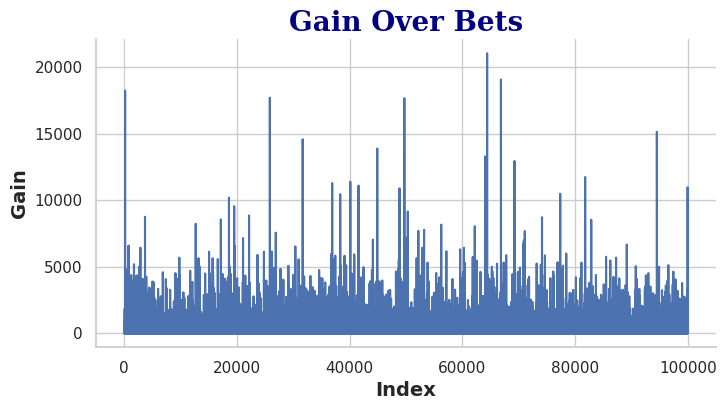

In [22]:
plt.figure(figsize=(8, 4))
df['gain'].plot(kind='line')
plt.title("Gain Over Bets", fontsize=20, color='navy', fontweight='bold', fontfamily='serif')
plt.xlabel("Index", fontsize=14, fontweight='bold')
plt.ylabel("Gain", fontsize=14, fontweight='bold')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

<ipython-input-23-64a7d2723f45>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sport', y='GGR', data=df, estimator=sum, ci=None)


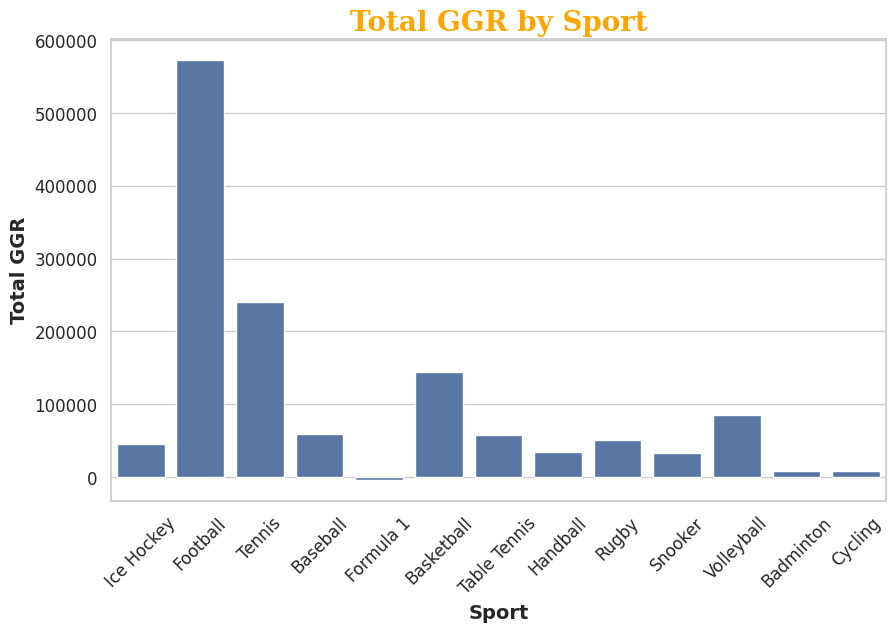

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='sport', y='GGR', data=df, estimator=sum, ci=None)
plt.title("Total GGR by Sport", fontsize=20, color='orange', fontweight='bold', fontfamily='serif')
plt.xlabel("Sport", fontsize=14, fontweight='bold')
plt.ylabel("Total GGR", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

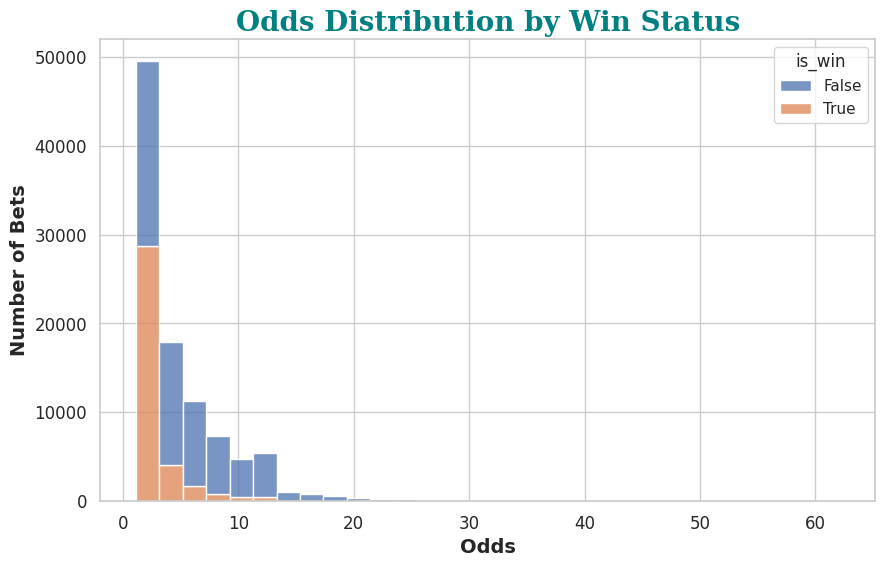

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='odds', hue='is_win', multiple='stack', bins=30)
plt.title("Odds Distribution by Win Status", fontsize=20, color='teal', fontweight='bold', fontfamily='serif')
plt.xlabel("Odds", fontsize=14, fontweight='bold')
plt.ylabel("Number of Bets", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

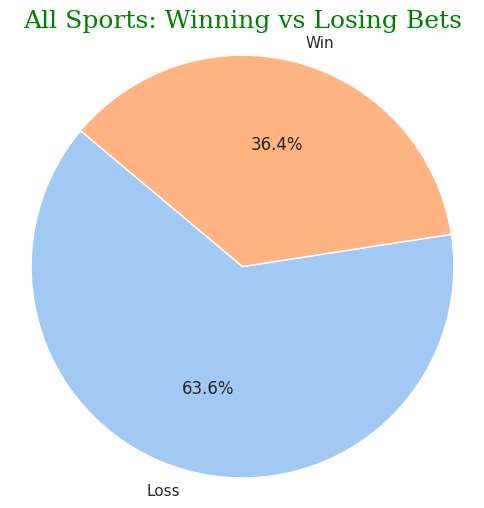

In [25]:
outcomes = df['is_win'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    outcomes,
    labels=['Loss', 'Win'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')[0:2]
)
plt.title("All Sports: Winning vs Losing Bets", fontsize=18, color='green', fontfamily='serif')
plt.axis('equal')
plt.show()

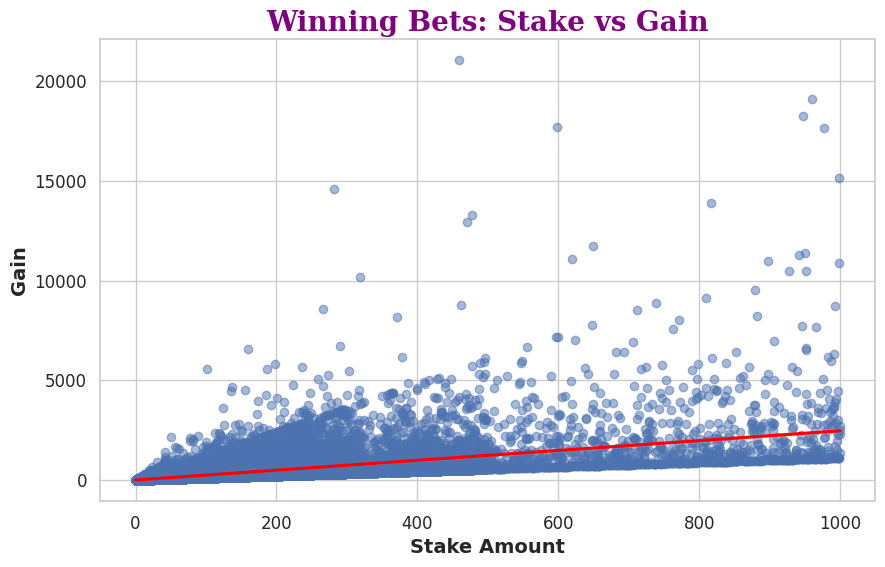

In [26]:
winning_df = df[df['is_win'] == True]
plt.figure(figsize=(10,6))
sns.regplot(x='stake', y='gain', data=winning_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Winning Bets: Stake vs Gain", fontsize=20, color='purple', fontweight='bold', fontfamily='serif')
plt.xlabel("Stake Amount", fontsize=14, fontweight='bold')
plt.ylabel("Gain", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

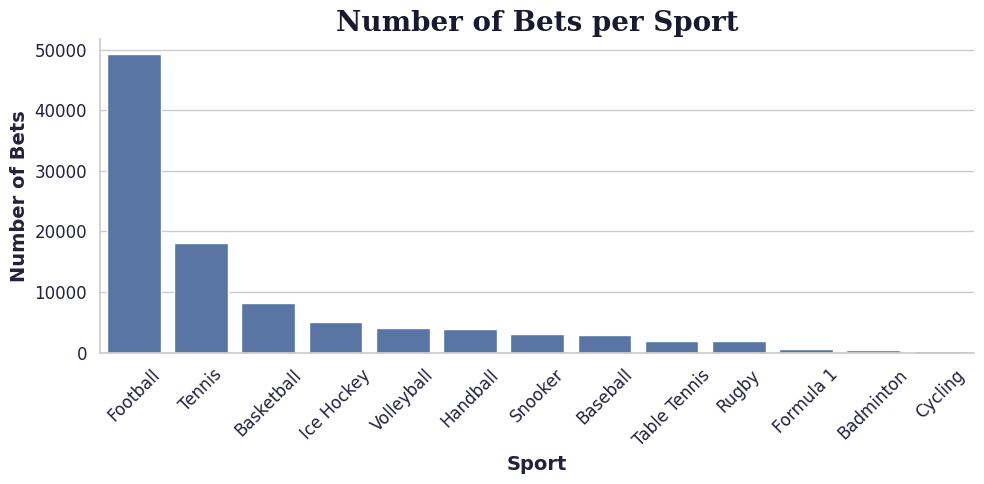

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='sport', data=df, order=df['sport'].value_counts().index)
plt.title('Number of Bets per Sport', fontsize=20, color='#1a1a2e', fontweight='bold', fontfamily='serif')
plt.xlabel('Sport', fontsize=14, color='#22223b', fontweight='bold')
plt.ylabel('Number of Bets', fontsize=14, color='#22223b', fontweight='bold')
plt.xticks(rotation=45, fontsize=12, color='#22223b')
plt.yticks(fontsize=12, color='#22223b')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

<ipython-input-28-7ff44c02b7aa>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


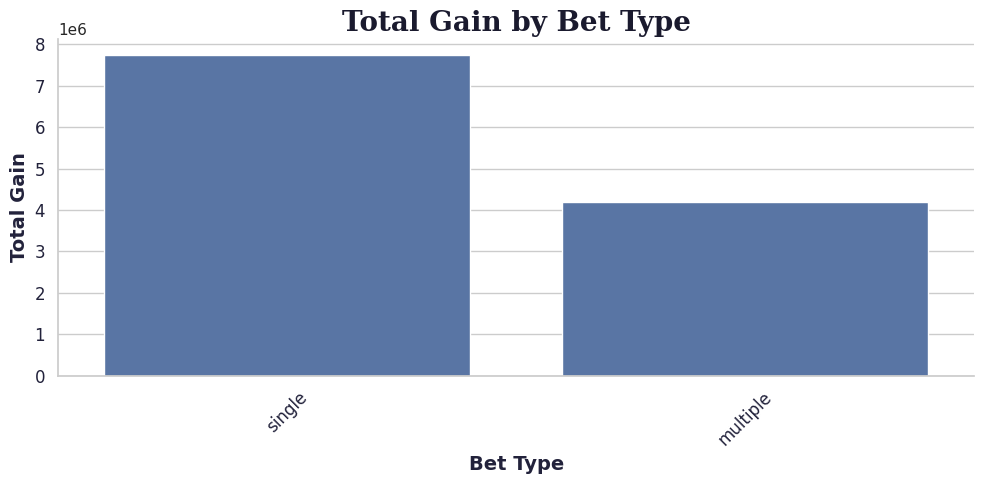

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(
    x='bet_type',
    y='gain',
    data=df,
    estimator=sum,
    ci=None,
    order=df['bet_type'].value_counts().index
)
plt.title('Total Gain by Bet Type', fontsize=20, color='#1a1a2e', fontweight='bold', fontfamily='serif')
plt.xlabel('Bet Type', fontsize=14, color='#22223b', fontweight='bold')
plt.ylabel('Total Gain', fontsize=14, color='#22223b', fontweight='bold')
plt.xticks(rotation=45, fontsize=12, color='#22223b')
plt.yticks(fontsize=12, color='#22223b')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

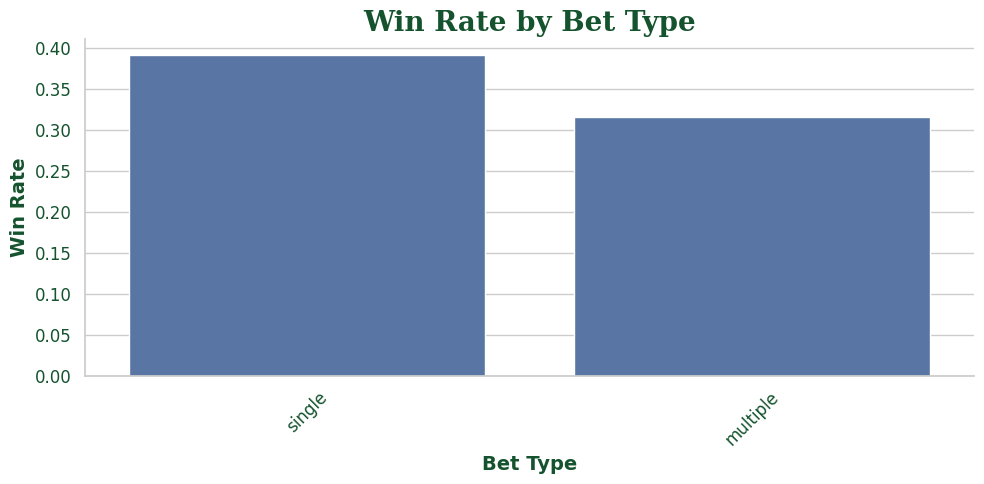

In [29]:
win_rates = df.groupby('bet_type')['is_win'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=win_rates.index, y=win_rates.values)
plt.title('Win Rate by Bet Type', fontsize=20, color='#14532d', fontweight='bold', fontfamily='serif')  # dark green
plt.ylabel('Win Rate', fontsize=14, color='#14532d', fontweight='bold')
plt.xlabel('Bet Type', fontsize=14, color='#14532d', fontweight='bold')
plt.xticks(rotation=45, fontsize=12, color='#14532d')
plt.yticks(fontsize=12, color='#14532d')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

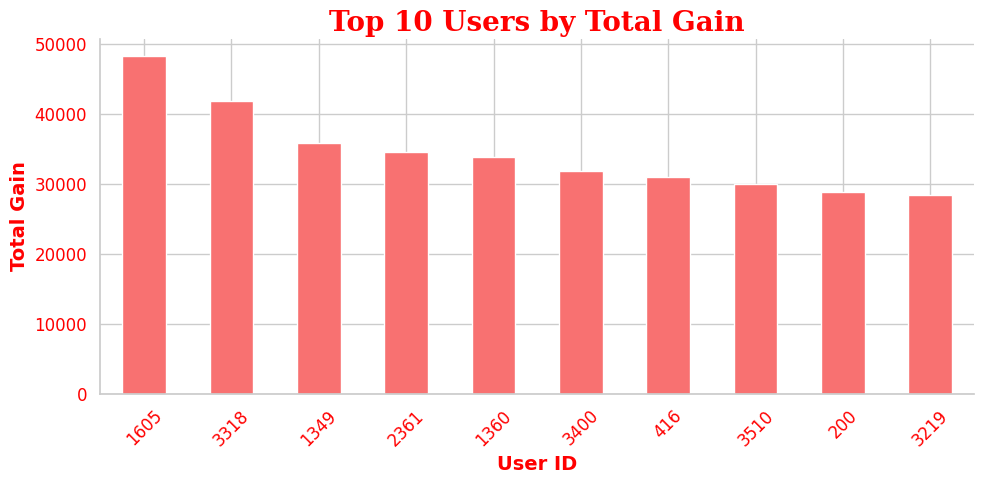

In [30]:
top_users = df.groupby('user_id')['gain'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_users.plot(kind='bar', color='#f87171')

plt.title('Top 10 Users by Total Gain', fontsize=20, color='red', fontweight='bold', fontfamily='serif')
plt.xlabel('User ID', fontsize=14, color='red', fontweight='bold')
plt.ylabel('Total Gain', fontsize=14, color='red', fontweight='bold')
plt.xticks(fontsize=12, color='red', rotation=45)
plt.yticks(fontsize=12, color='red')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

# **Hypothesis Test**

In [31]:
print("\n" + "="*25 + " HYPOTHESIS TESTING " + "="*25)

print("\nHypothesis 1: Is the average GGR the same for all sports?")
print("Null Hypothesis (H0): The average GGR is the same for all sports.")
print("Alternative Hypothesis (H1): At least one sport has a different average GGR.")
ggr_by_sport = [group['GGR'].dropna() for name, group in df.groupby('sport')]
if len(ggr_by_sport) > 1:
    fvalue, pvalue_anova = stats.f_oneway(*ggr_by_sport)
    print(f"Test: One-way ANOVA\nF-statistic = {fvalue:.4f}, P-value = {pvalue_anova:.4f}")
    if pvalue_anova < 0.05:
        print("Result: Reject the null hypothesis.")
        print("Conclusion: There is a significant difference in average GGR across sports.\n")
    else:
        print("Result: Fail to reject the null hypothesis.")
        print("Conclusion: No significant difference in average GGR across sports.\n")
else:
    print("Not enough sports to perform ANOVA.\n")

print("-"*60)


========================= HYPOTHESIS TESTING =========================

Hypothesis 1: Is the average GGR the same for all sports?
Null Hypothesis (H0): The average GGR is the same for all sports.
Alternative Hypothesis (H1): At least one sport has a different average GGR.
Test: One-way ANOVA
F-statistic = 1.0199, P-value = 0.4267
Result: Fail to reject the null hypothesis.
Conclusion: No significant difference in average GGR across sports.

------------------------------------------------------------


In [32]:
print("Hypothesis 2: Does the probability of winning change with the odds chosen?")
print("Null Hypothesis (H0): The probability of winning is independent of the odds category.")
print("Alternative Hypothesis (H1): The probability of winning depends on the odds category.")
df['odds_category'] = pd.cut(df['odds'], bins=[0, 2, 5, df['odds'].max()], labels=['Low', 'Medium', 'High'])
contingency_table = pd.crosstab(df['odds_category'], df['is_win'])
if contingency_table.shape[0] > 1 and all(contingency_table.sum(axis=1) > 0) and all(contingency_table.sum(axis=0) > 0):
    chi2, pvalue_chi2, _, _ = stats.chi2_contingency(contingency_table)
    print(f"Test: Chi-squared Test of Independence\nChi2 = {chi2:.4f}, P-value = {pvalue_chi2:.4f}")
    if pvalue_chi2 < 0.05:
        print("Result: Reject the null hypothesis.")
        print("Conclusion: The probability of winning a bet depends on the odds category.\n")
    else:
        print("Result: Fail to reject the null hypothesis.")
        print("Conclusion: No significant evidence that the probability of winning depends on the odds category.\n")
else:
    print("Not enough data/categories to perform Chi-squared test.\n")

print("-"*60)

Hypothesis 2: Does the probability of winning change with the odds chosen?
Null Hypothesis (H0): The probability of winning is independent of the odds category.
Alternative Hypothesis (H1): The probability of winning depends on the odds category.
Test: Chi-squared Test of Independence
Chi2 = 22904.0156, P-value = 0.0000
Result: Reject the null hypothesis.
Conclusion: The probability of winning a bet depends on the odds category.

------------------------------------------------------------


In [33]:
print("Hypothesis 3: Is the proportion of winning bets significantly different from losing bets?")
print("Null Hypothesis (H0): The proportion of winning bets = 0.5 (same as losing bets).")
print("Alternative Hypothesis (H1): The proportion of winning bets is different from 0.5.")
outcomes = df['is_win'].value_counts()
num_wins = outcomes.get(True, 0)
num_losses = outcomes.get(False, 0)
total_bets = num_wins + num_losses
if total_bets > 0:
    z_stat, pvalue_proportion = proportions_ztest(count=num_wins, nobs=total_bets, value=0.5, alternative='two-sided')
    print(f"Test: One-sample Proportion Z-test\nZ = {z_stat:.4f}, P-value = {pvalue_proportion:.4f}")
    if pvalue_proportion < 0.05:
        print("Result: Reject the null hypothesis.")
        print("Conclusion: The proportion of winning bets is significantly different from the proportion of losing bets.\n")
    else:
        print("Result: Fail to reject the null hypothesis.")
        print("Conclusion: No significant evidence that the win/loss proportions are different (close to 50/50).\n")
else:
    print("Not enough data for Z-test.\n")

print("-"*60)

Hypothesis 3: Is the proportion of winning bets significantly different from losing bets?
Null Hypothesis (H0): The proportion of winning bets = 0.5 (same as losing bets).
Alternative Hypothesis (H1): The proportion of winning bets is different from 0.5.
Test: One-sample Proportion Z-test
Z = -89.0505, P-value = 0.0000
Result: Reject the null hypothesis.
Conclusion: The proportion of winning bets is significantly different from the proportion of losing bets.

------------------------------------------------------------


In [34]:
print("Hypothesis 4: Is there a significant relationship between the amount staked and gain among winning bets?")
print("Null Hypothesis (H0): There is no linear relationship between stake and gain among winning bets (slope = 0).")
print("Alternative Hypothesis (H1): There is a linear relationship between stake and gain among winning bets (slope ≠ 0).")
winning_df = df[df['is_win'] == True]
if not winning_df.empty:
    slope, intercept, r_value, pvalue_reg, _ = stats.linregress(winning_df['stake'], winning_df['gain'])
    print(f"Test: Linear Regression\nSlope = {slope:.4f}, r = {r_value:.3f}, P-value = {pvalue_reg:.4f}")
    if pvalue_reg < 0.05:
        print("Result: Reject the null hypothesis.")
        print("Conclusion: There is a significant linear relationship between stake and gain among winning bets.\n")
    else:
        print("Result: Fail to reject the null hypothesis.")
        print("Conclusion: No significant linear relationship between stake and gain among winning bets.\n")
else:
    print("Not enough winning bets to perform regression.\n")

print("="*70)

Hypothesis 4: Is there a significant relationship between the amount staked and gain among winning bets?
Null Hypothesis (H0): There is no linear relationship between stake and gain among winning bets (slope = 0).
Alternative Hypothesis (H1): There is a linear relationship between stake and gain among winning bets (slope ≠ 0).
Test: Linear Regression
Slope = 2.4722, r = 0.591, P-value = 0.0000
Result: Reject the null hypothesis.
Conclusion: There is a significant linear relationship between stake and gain among winning bets.



# **Summary**


**We analyzed sports betting data to see what really makes a difference in winning or losing. Our charts showed which sports are most popular and who the top users are. We also tested if the amount you bet or the odds you pick affect your chances of winning. These results help show what matters most in sports betting.**